In [1]:
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np
%matplotlib inline

In [2]:
nscenarios = 3

In [3]:
undecimated = ""
radiotelescope = "jvla"

In [4]:
means_file = undecimated+"wavelet_"+radiotelescope+"_means.npy"

In [5]:
stds_file = undecimated+"wavelet_"+radiotelescope+"_stds.npy"

In [6]:
use_wavelet = pywt.wavelist(kind="discrete")
use_wavelet.remove("haar")
nwavelets = len(use_wavelet)
idx_coif = [use_wavelet.index("coif1") - 0.5, use_wavelet.index("db1") - 0.5, use_wavelet.index("dmey") - 0.5,  use_wavelet.index("rbio1.1") - 0.5, use_wavelet.index("sym2") - 0.5]

In [7]:
scenarios_means = np.load(means_file)
scenarios_stds = np.load(stds_file)

In [8]:
# Getting minimum AICs
idx_sc1 = np.argmin(scenarios_means[0, 2])
idx_sc2 = np.argmin(scenarios_means[1, 2])
idx_sc3 = np.argmin(scenarios_means[2, 2])

In [9]:
print("Scenario 1: Best AIC Wavelet: "+use_wavelet[idx_sc1]+" "+str(scenarios_means[0, 2, idx_sc1])+"+-"+str(scenarios_stds[0, 2, idx_sc1]))
print("Scenario 2: Best AIC Wavelet: "+use_wavelet[idx_sc2]+" "+str(scenarios_means[1, 2, idx_sc2])+"+-"+str(scenarios_stds[1, 2, idx_sc2]))
print("Scenario 3: Best AIC Wavelet: "+use_wavelet[idx_sc3]+" "+str(scenarios_means[2, 2, idx_sc3])+"+-"+str(scenarios_stds[2, 2, idx_sc3]))

Scenario 1: Best AIC Wavelet: coif5 -22808.463+-65.11037
Scenario 2: Best AIC Wavelet: coif2 -22775.209+-25.196825
Scenario 3: Best AIC Wavelet: bior1.5 -22439.041+-47.247433


In [10]:
print("Scenario 1: Best AIC Wavelet BIC: "+use_wavelet[idx_sc1]+" "+str(scenarios_means[0, 3, idx_sc1])+"+-"+str(scenarios_stds[0, 3, idx_sc1]))
print("Scenario 2: Best AIC Wavelet BIC: "+use_wavelet[idx_sc2]+" "+str(scenarios_means[1, 3, idx_sc2])+"+-"+str(scenarios_stds[1, 3, idx_sc2]))
print("Scenario 3: Best AIC Wavelet BIC: "+use_wavelet[idx_sc3]+" "+str(scenarios_means[2, 3, idx_sc3])+"+-"+str(scenarios_stds[2, 3, idx_sc3]))

Scenario 1: Best AIC Wavelet BIC: coif5 -22457.832+-24.787094
Scenario 2: Best AIC Wavelet BIC: coif2 -22476.207+-15.009331
Scenario 3: Best AIC Wavelet BIC: bior1.5 -21961.494+-96.15987


In [11]:
print("Scenario 1: Best AIC Wavelet PSNR: "+use_wavelet[idx_sc1]+" "+str(scenarios_means[0, 0, idx_sc1])+"+-"+str(scenarios_stds[0, 0, idx_sc1]))
print("Scenario 2: Best AIC Wavelet PSNR: "+use_wavelet[idx_sc2]+" "+str(scenarios_means[1, 0, idx_sc2])+"+-"+str(scenarios_stds[1, 0, idx_sc2]))
print("Scenario 3: Best AIC Wavelet PSNR: "+use_wavelet[idx_sc3]+" "+str(scenarios_means[2, 0, idx_sc3])+"+-"+str(scenarios_stds[2, 0, idx_sc3]))

Scenario 1: Best AIC Wavelet PSNR: coif5 111.96721+-5.4670177
Scenario 2: Best AIC Wavelet PSNR: coif2 101.31822+-3.4068406
Scenario 3: Best AIC Wavelet PSNR: bior1.5 110.79368+-4.9827356


In [12]:
print("Scenario 1: Best AIC Wavelet RMSE: "+use_wavelet[idx_sc1]+" "+str(scenarios_means[0, 1, idx_sc1])+"+-"+str(scenarios_stds[0, 1, idx_sc1]))
print("Scenario 2: Best AIC Wavelet RMSE: "+use_wavelet[idx_sc2]+" "+str(scenarios_means[1, 1, idx_sc2])+"+-"+str(scenarios_stds[1, 1, idx_sc2]))
print("Scenario 3: Best AIC Wavelet RMSE: "+use_wavelet[idx_sc3]+" "+str(scenarios_means[2, 1, idx_sc3])+"+-"+str(scenarios_stds[2, 1, idx_sc3]))

Scenario 1: Best AIC Wavelet RMSE: coif5 0.00077082176+-2.0047586e-05
Scenario 2: Best AIC Wavelet RMSE: coif2 0.00078332965+-7.5358375e-06
Scenario 3: Best AIC Wavelet RMSE: bior1.5 0.0008522652+-1.12545695e-05


In [13]:
#coif2_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "coif2"][0]
#sym6_idx = [x for x in range(len(use_wavelet)) if use_wavelet[x] == "sym6"][0]

In [14]:
#print("AIC Scenario 2 coif2: "+str(scenarios_means[1, 2, coif2_idx]))

In [15]:
#print("AIC Scenario 2 sym6: "+str(scenarios_means[1, 2, sym6_idx]))

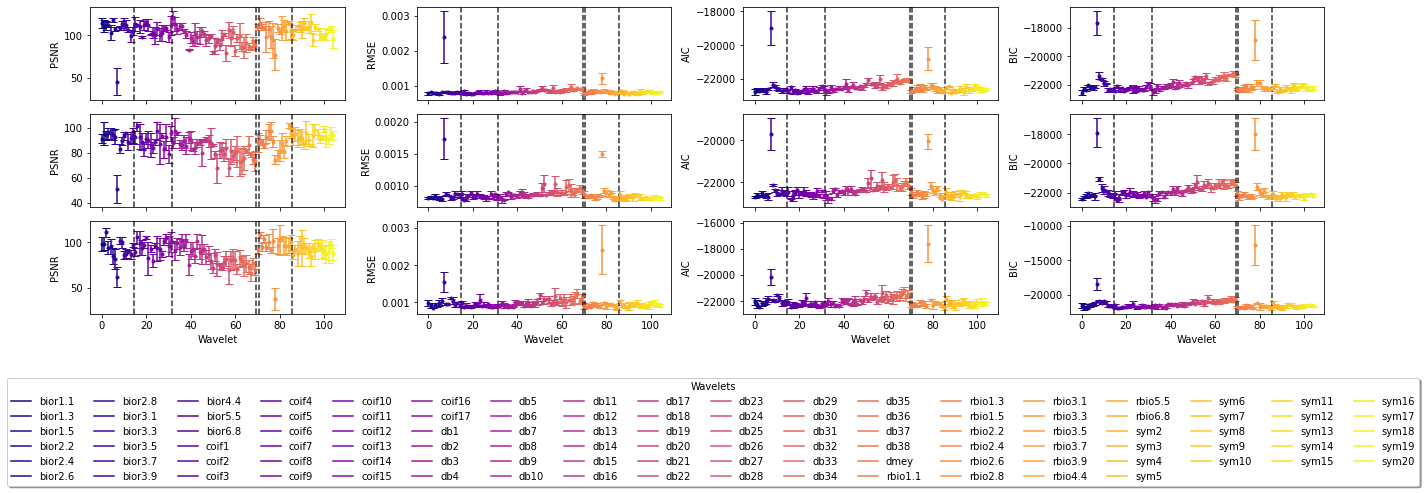

In [16]:
_id = np.arange(0, nwavelets)
names = ["PSNR", "RMSE", "AIC", "BIC"]  
fig, ax = plt.subplots(nrows=scenarios_means.shape[0], ncols=len(names), sharey='none', sharex='all', figsize=(18, 5))
#cmap = plt.get_cmap('tab20')
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, nwavelets)]

for i in range(scenarios_means.shape[0]):
    for j in range(len(names)):
        for k in range(scenarios_means.shape[2]):
            ax[i,j].plot(_id[k], scenarios_means[i,j,k], label=use_wavelet[k], color=colors[k])
            ax[i,j].errorbar(_id[k], scenarios_means[i,j,k], yerr = scenarios_stds[i,j,k], fmt ='.', capsize=4, color=colors[k])
            #if names[f] == "PSNR" and sc==3:
            #ax[sc-1,f].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
            ax[i,j].set_ylabel(names[j])
        if i==2:
            ax[i,j].set_xlabel("Wavelet")

for k in range(len(idx_coif)):
    for i in range(scenarios_means.shape[0]):
        for j in range(len(names)):
            ax[i,j].axvline(x = idx_coif[k], color = 'k', linestyle="--", alpha=0.8)
            
#for i in range(scenarios_means.shape[0]):
    #ax[i,1].set_ylim([0,0.0015])
    #ax[i,2].set_ylim([-25000,-20000])
    #ax[i,3].set_ylim([-25000,-20000])

    #ax[i,2].set_ylim([-25000,-15000]) #undecimated
    #ax[i,3].set_ylim([-25000,17500]) #undecimated

ofile_name = undecimated+"wavelets_"+radiotelescope+".png"
#fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=19, fancybox=True, shadow=True, title="Wavelets")
#ax[len(scenarios)-1, 1].legend(loc='upper left', bbox_to_anchor=[1.0, -0.5], ncol=19, fancybox=True, shadow=True, title="Wavelets")
h, l = ax[0,0].get_legend_handles_labels()
legend = fig.legend(h, l, loc='lower center', ncol=18, fancybox=True, bbox_to_anchor=[0.52, -0.375], shadow=True, title="Wavelets")
fig.tight_layout()
if os.path.isfile(ofile_name):
    os.remove(ofile_name)   # Opt.: os.system("rm "+strFile)
fig.savefig(ofile_name, dpi=100, bbox_inches='tight')#